<a href="https://colab.research.google.com/github/WiktorStasiak/Analiza-VIX-wska-nika-strachu-na-rynkach-finansowych/blob/colab/Analiza_VIXu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Przygotowanie danych

In [ ]:
df_s8p500 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dane/S&P500vsVIX/S&P 500 - U.S..csv')
df_vix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dane/S&P500vsVIX/S&P 500 VIX Cash.csv')

In [ ]:
df_s8p500.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,1990-01-02,353.40,359.69,351.98,359.69,90038889.0
1,1990-01-03,359.69,360.59,357.89,358.76,106850000.0
2,1990-01-04,358.76,358.76,352.89,355.67,98333333.0
3,1990-01-05,355.67,355.67,351.35,352.20,88072222.0
4,1990-01-08,352.20,354.24,350.54,353.79,77838889.0


In [ ]:
df_vix.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,1990-01-02,17.24,17.24,17.24,17.24
1,1990-01-03,18.19,18.19,18.19,18.19
2,1990-01-04,19.22,19.22,19.22,19.22
3,1990-01-05,20.11,20.11,20.11,20.11
4,1990-01-08,20.26,20.26,20.26,20.26


In [ ]:
df_s8p500.rename(columns={'Data': 'Date'}, inplace=True)
df_vix.rename(columns={'Data': 'Date'}, inplace=True)

df_s8p500['Date'] = pd.to_datetime(df_s8p500['Date'])
df_vix['Date'] = pd.to_datetime(df_vix['Date'])

df = pd.merge(df_s8p500[['Date', 'Zamkniecie']], df_vix[['Date', 'Zamkniecie']], on='Date', how='inner')
df.rename(columns={'Zamkniecie_x': 'S&P500', 'Zamkniecie_y': 'VIX'}, inplace=True)

display(df.tail())

,Date,S&P500,VIX
8970,2025-08-22,6466.91,14.22
8971,2025-08-25,6439.32,14.79
8972,2025-08-26,6465.94,14.62
8973,2025-08-27,6481.40,14.85
8974,2025-08-28,6501.86,14.43


## Analiza indeksu VIX

### Podstawowe informacje o indeksie VIX

In [ ]:
print(df['VIX'].describe())

count    8975.000000
mean       19.477661
std         7.815333
min         9.140000
25%        13.895000
50%        17.620000
75%        22.790000
max        82.690000
Name: VIX, dtype: float64


### Wizualizacja obu indeksów w czasie

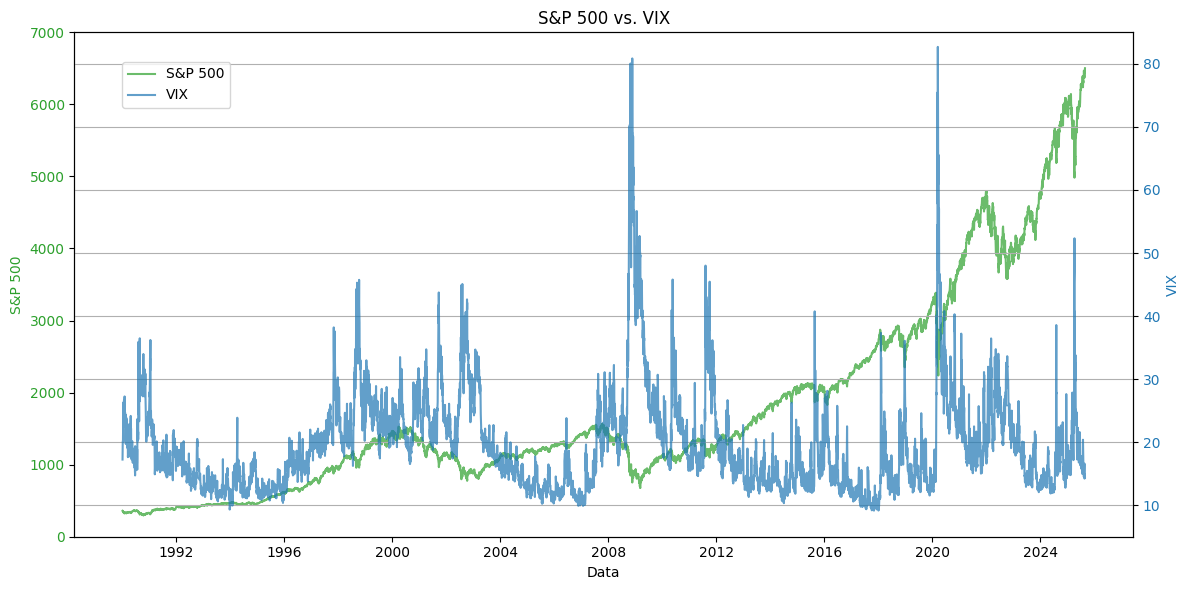

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df['Date'], df['S&P500'], label='S&P 500', color='tab:green', alpha=0.7)
ax1.set_xlabel('Data')
ax1.set_ylabel('S&P 500', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')
ax1.set_ylim([0, 7000])

ax2 = ax1.twinx()
ax2.plot(df['Date'], df['VIX'], label='VIX', color='tab:blue', alpha=0.7)
ax2.set_ylabel('VIX', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim([5, 85])

plt.title('S&P 500 vs. VIX')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.show()

### Korelacja między badanymi indeksami

In [ ]:
correlation = df['S&P500'].corr(df['VIX'])
print(f"Korelacja między S&P 500 a VIX wynosi: {correlation}")

Korelacja między S&P 500 a VIX wynosi: -0.058070023168612685


### Rozkład wartości indeksu VIX

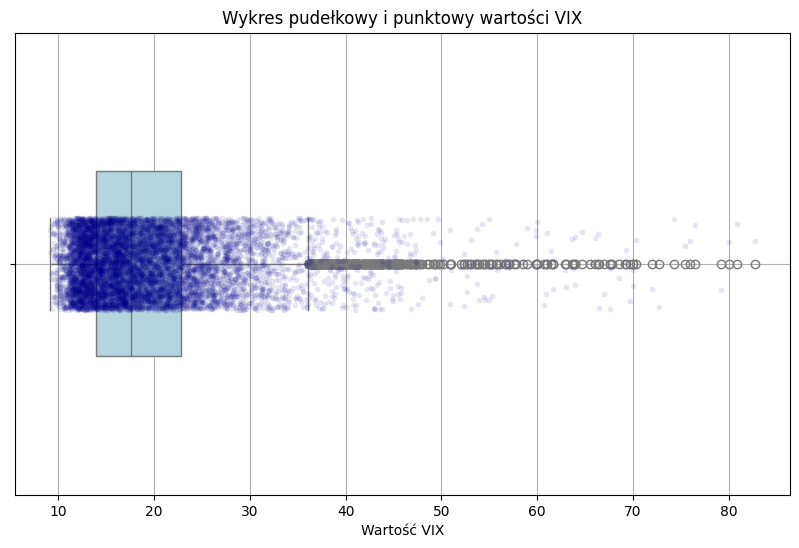

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['VIX'], vert=False, patch_artist=True, ax=plt.gca(), width=0.4, color='lightblue')
sns.stripplot(x=df['VIX'], alpha=0.1, size=4, color='darkblue', ax=plt.gca())

plt.xlabel('Wartość VIX')
plt.title('Wykres pudełkowy i punktowy wartości VIX')
plt.grid(True)
plt.show()

### Rozkład wartości VIX

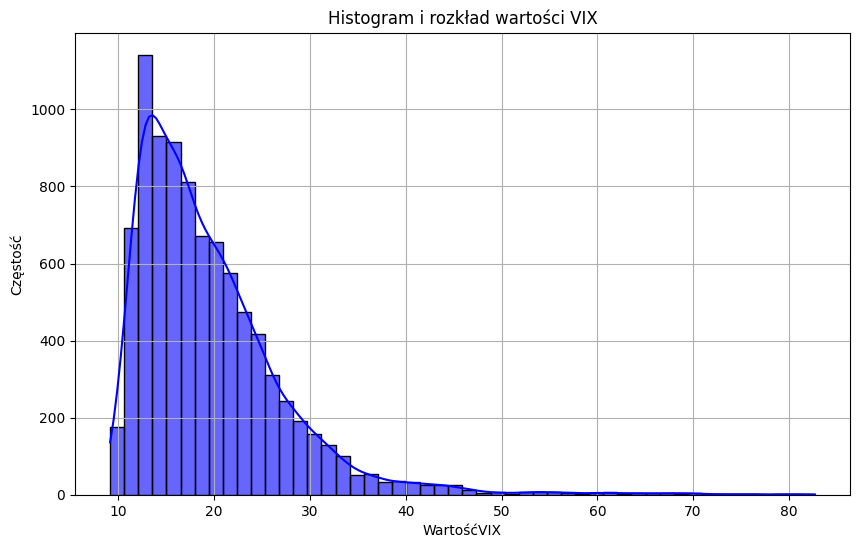

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['VIX'], bins=50, kde=True, color='blue', alpha=0.6)
plt.xlabel('WartośćVIX')
plt.ylabel('Częstość')
plt.title('Histogram i rozkład wartości VIX')
plt.grid(True)
plt.show()

### Analiza średnich ruchomych

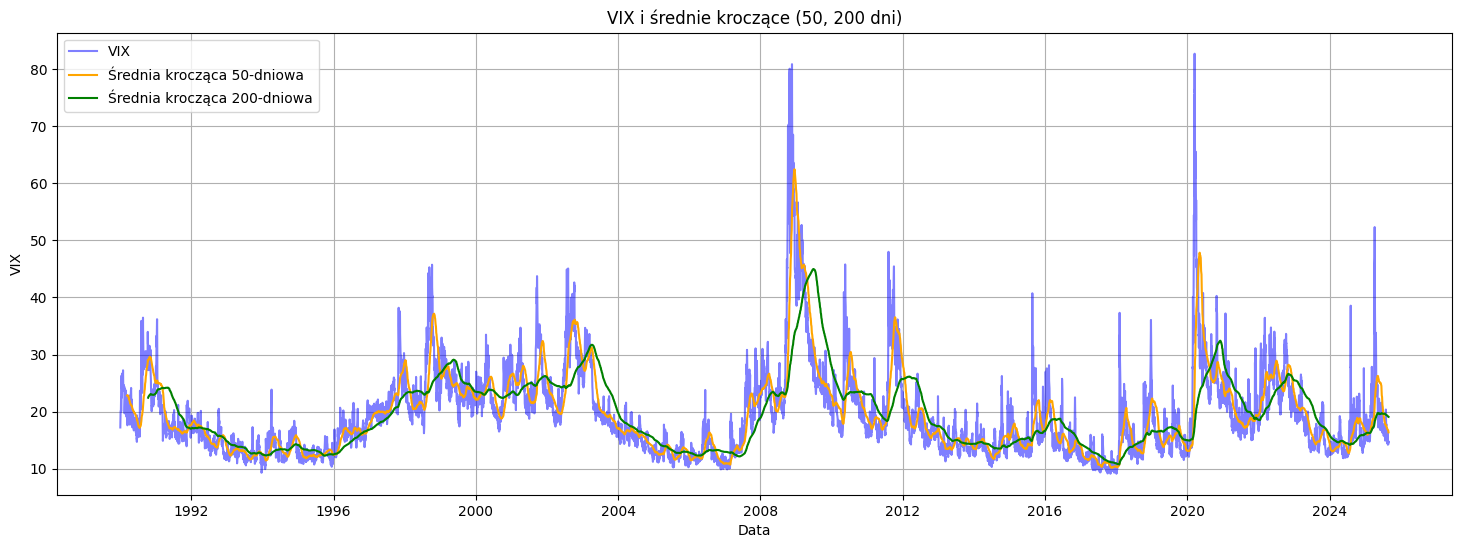

In [ ]:
df['VIX_MA50'] = df['VIX'].rolling(window=50).mean()
df['VIX_MA200'] = df['VIX'].rolling(window=200).mean()

plt.figure(figsize=(18,6))
plt.plot(df['Date'], df['VIX'], label='VIX', color='blue', alpha=0.5)
plt.plot(df['Date'], df['VIX_MA50'], label='Średnia krocząca 50-dniowa', color='orange')
plt.plot(df['Date'], df['VIX_MA200'], label='Średnia krocząca 200-dniowa', color='green')
plt.title('VIX i średnie kroczące (50, 200 dni)')
plt.xlabel('Data')
plt.ylabel('VIX')
plt.legend()
plt.grid(True)
plt.show()

### Kwantyle

In [ ]:
quantiles = df['VIX'].quantile([0, 0.25, 0.5, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99])

data = []
for q_level, q_value in quantiles.items():
    count_above_quantile = df[df['VIX'] > q_value].shape[0]
    data.append({'Kwartyl': f'{int(q_level*100)}%', 'Wartość': round(q_value, 2), 'Liczba dni powyżej kwartyla': count_above_quantile})

quantile_table = pd.DataFrame(data)
display(quantile_table)

,Kwartyl,Wartość,Liczba dni powyżej kwartyla
0,0%,9.14,8974
1,25%,13.89,6731
2,50%,17.62,4485
3,75%,22.79,2240
4,80%,24.28,1793
5,85%,26.01,1346
6,90%,28.67,894
7,95%,33.12,449
8,99%,47.01,90


### Autokorelacja i sezonowość

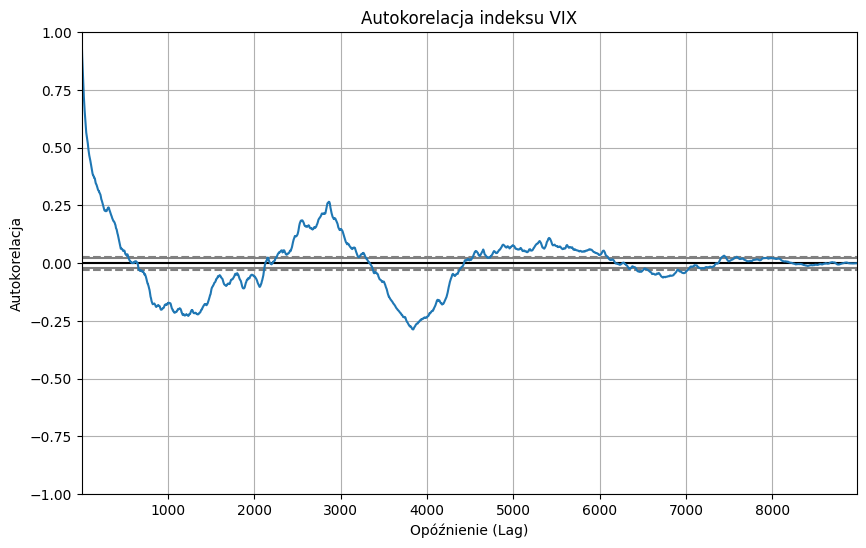

In [ ]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,6))
autocorrelation_plot(df['VIX'])
plt.title('Autokorelacja indeksu VIX')
plt.xlabel('Opóźnienie (Lag)')
plt.ylabel('Autokorelacja')
plt.grid(True)
plt.show()

### Ekstremalne zdarzenia

In [ ]:
top15 = df.nlargest(15, 'VIX')
print("Top 15 dni z najwyższym VIX:")
print(top15[['Date', 'VIX']])

Top 15 dni z najwyższym VIX:
           Date    VIX
7603 2020-03-16  82.69
4760 2008-11-20  80.86
4742 2008-10-27  80.06
4741 2008-10-24  79.13
7605 2020-03-18  76.45
7604 2020-03-17  75.91
7601 2020-03-12  75.47
4759 2008-11-19  74.26
4761 2008-11-21  72.67
7606 2020-03-19  72.00
4736 2008-10-17  70.33
4744 2008-10-29  69.96
4731 2008-10-10  69.95
4739 2008-10-22  69.65
4734 2008-10-15  69.25


### Rozkład stóp zwrotu S&P500 po wysokich wartościach indeksu VIX

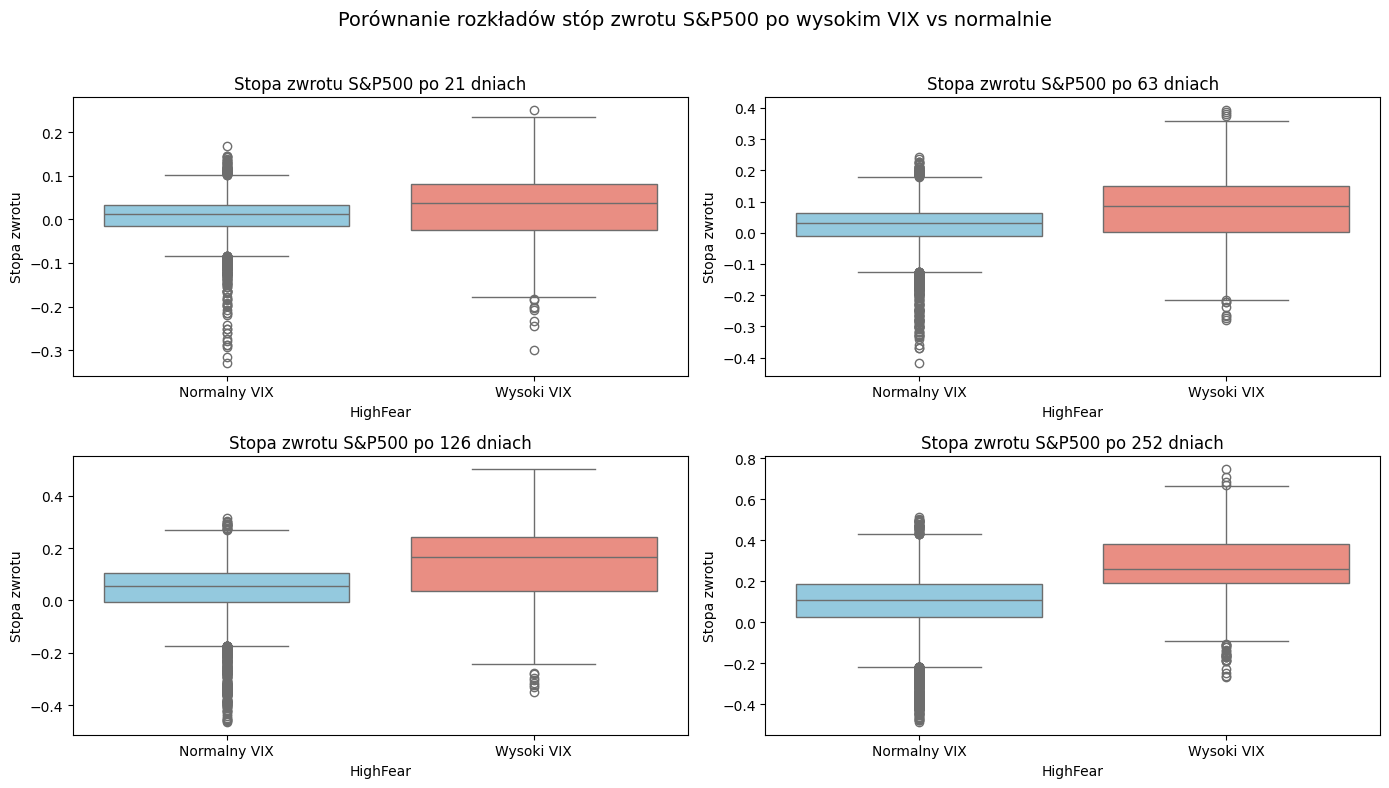

In [ ]:
horizons = [21, 63, 126, 252]

for horizon in horizons:
    df[f'return_{horizon}d'] = df['S&P500'].pct_change(periods=horizon).shift(-horizon)

threshold = df['VIX'].quantile(0.95)
df['HighFear'] = df['VIX'] > threshold

plt.figure(figsize=(14, 8))

for i, horizon in enumerate(horizons, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(
        data=df,
        x='HighFear',
        y=f'return_{horizon}d',
        palette=['skyblue', 'salmon'],
        hue='HighFear',
        legend=False
    )
    plt.title(f'Stopa zwrotu S&P500 po {horizon} dniach')
    plt.xticks([0, 1], ['Normalny VIX', 'Wysoki VIX'])
    plt.ylabel('Stopa zwrotu')

plt.suptitle('Porównanie rozkładów stóp zwrotu S&P500 po wysokim VIX vs normalnie', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### różnice w zwrotach między grupami

t-stat:
- wartości t-stat są dodatnie więc średnie zwroty w okresach wysokiego strachu są istotnie wyższe niż w normalnych warunkach
- wartości rosną z horyzontem czasowym - im dłuższy okres, tym większa różnica między grupami

p-value:
- wszystkie wartości p-value są znacząco niższe od 0,05
- prawdopodobieństwo, że zaobserwowane różnice są przypadkowe, jest znikome

In [ ]:
results = []

for horizon in horizons:
    col = f'return_{horizon}d'

    highfear = df.loc[df['HighFear'], col].dropna()
    normal = df.loc[~df['HighFear'], col].dropna()

    mean_high = highfear.mean()
    mean_normal = normal.mean()

    t_stat, p_value = stats.ttest_ind(highfear, normal, equal_var=False)

    results.append({
        "Horyzont (dni)": horizon,
        "Śr. zwrot wysoki VIX": mean_high,
        "Śr. zwrot normalny VIX": mean_normal,
        "Różnica": mean_high - mean_normal,
        "t-stat": t_stat,
        "p-value": p_value
    })

results_df = pd.DataFrame(results)
print(results_df)

   Horyzont (dni)  Śr. zwrot wysoki VIX  Śr. zwrot normalny VIX   Różnica  \
0              21              0.025743                0.007002  0.018741   
1              63              0.071724                0.021112  0.050612   
2             126              0.141608                0.042232  0.099376   
3             252              0.264687                0.090584  0.174103   

      t-stat       p-value  
0   4.536002  7.328930e-06  
1   8.724392  4.837132e-17  
2  13.760565  2.367352e-36  
3  20.229609  3.583466e-66  
